In [3]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import json

import datetime as dt

In [4]:
fname = 'sp-pos-quot-dep-2021-03-28-19h20-reg3C-processed.csv'
d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
d.sample(3)

,reg,jour,three_class,P,T,pop,incidence,positivite,incidence hebdo
4928,Centre-Val de Loire,2021-02-18,0-19,108,1916,598570.0,18.043002,5.636743,111.599312
1516,Bourgogne-Franche-Comté,2020-07-14,0-19,0,63,627017.0,0.000000,0.000000,0.797427
11911,Occitanie,2020-09-14,whole,1401,26967,5924858.0,23.646136,5.195239,101.555177


In [5]:
fname = 'sp-pos-quot-dep-2021-03-28-19h20-nat3C-processed.csv'
dnat = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
dnat.sample(3)

,jour,three_class,P,T,pop,incidence,positivite,incidence hebdo
902,2020-12-24,60+,3372,97087,1.785758e+07,18.882734,3.473174,156.600139
1096,2021-02-11,0-19,3760,73318,1.609969e+07,23.354484,5.128345,149.033908
563,2020-09-30,whole,13168,184889,6.711500e+07,19.620057,7.122111,104.624905


In [6]:
d.dtypes

reg                        object
jour               datetime64[ns]
three_class                object
P                           int64
T                           int64
pop                       float64
incidence                 float64
positivite                float64
incidence hebdo           float64
dtype: object

In [7]:
regs = d['reg'].unique()
three_class = d['three_class'].unique()

In [62]:
def format_graph(ax, index):
    
    ax.set_ylim(-50,1150)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.patch.set_alpha(0)
    
    ax.axvline(dt.datetime(2021, 1, 1), 
               ymin = 0, ymax = 0.9, 
               c = 'black', 
               linewidth = 0.5,
               linestyle = '--')
    
    ax.tick_params(axis='y', left = False,
                   labelsize = 10)
        
    ax.tick_params(axis='x', bottom = True,
                   labelsize = 8)
    
    ax.grid(axis = 'y')
    
    if index == 0:
        ax.legend(bbox_to_anchor=[1.55, .45], 
              loc='center',
              labelspacing=0.5,       
              handlelength=2, 
              handletextpad=0.5,
              frameon=True,
              fontsize = 14,
              title = 'Incidence hebdomadaire\n(pour 100 000 habitants)',
              title_fontsize = 12,
              )
        
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        newlabels = ['mai', 'juin', 'juillet', 'août', 
                 'septembre', 'octobre', 'novambre', 'décembre', 
                 'janvier', 'février', 'mars', 'avril']
        ax.set_xticklabels(newlabels)
    
    else:
        ax.tick_params(axis='x', bottom = False)
        ax.set_xticklabels([])
        
    if index % 4 != 0:
        ax.set_yticklabels([])
        

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


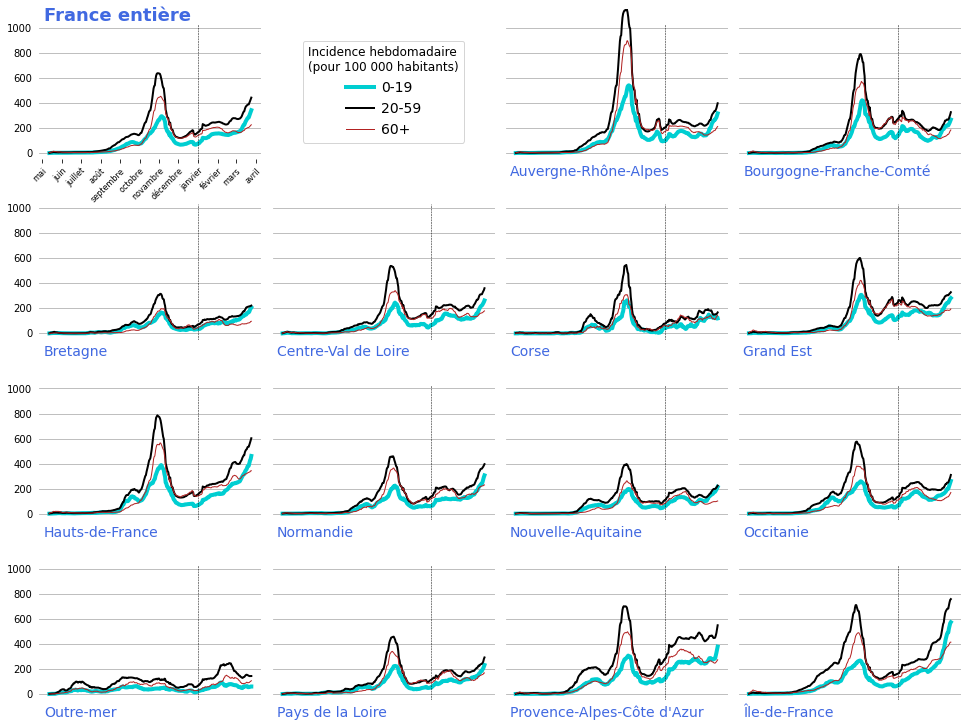

In [65]:
fig, axs = plt.subplots(4, 4, figsize = (16,12))
axs = axs.ravel()


ax = axs[0]

dplot = dnat.loc[dnat.three_class == '0-19']
ax.plot(dplot.jour, dplot["incidence hebdo"], c = "darkturquoise", linewidth = 4, label = '0-19')

dplot = dnat.loc[dnat.three_class == '20-59']
ax.plot(dplot.jour, dplot["incidence hebdo"], c = "black", linewidth = 2, label = '20-59')

dplot = dnat.loc[dnat.three_class == '60+']
ax.plot(dplot.jour, dplot["incidence hebdo"], c = "firebrick", linewidth = 1, label = '60+')


format_graph(ax, 0)
ax.set_title('France entière', x = 0.02, y = 0.88, loc = 'left', 
             fontsize = 18, c = 'royalblue', fontweight='semibold')
# ax.set_title('Incidence hebdomadaire\n(pour 100 000 habitants)', x = 1.6, y = 0.65, loc = 'center')

ax = axs[1]
ax.set_axis_off() 


for i, reg in enumerate(regs):
    
    ax = axs[i+2]
    
    sns.set_palette("mako",2)
    
    dplot = d.loc[d.reg == reg].loc[d.three_class == '0-19']
    ax.plot(dplot.jour, dplot["incidence hebdo"], c = "darkturquoise", linewidth = 4)
    
    dplot = d.loc[d.reg == reg].loc[d.three_class == '20-59']
    ax.plot(dplot.jour, dplot["incidence hebdo"], linewidth = 2, c = "black")
    
    dplot = d.loc[d.reg == reg].loc[d.three_class == '60+']
    ax.plot(dplot.jour, dplot["incidence hebdo"], c = "firebrick", linewidth = 1, label = '60+')
    
    
    format_graph(ax, i+2)

    ax.set_title(reg, x = 0.02, y = -0.15, loc = 'left', 
                 fontsize = 14, c = 'royalblue', fontweight='normal', family = 'sans')


fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.2)
fig.savefig("fig3.pdf", pad_inches = 0)